$\textbf{Mini Prroject EOSC 511}$

Name: Vicente Valenzuela Carrasco

$$\frac{\partial T}{\partial t} = \frac{\partial}{\partial z} \bigg ( A_{h} \frac{\partial T}{\partial z} \bigg ) - \frac{1}{c_{p}} \frac{\partial I}{\partial z} $$


$\textbf{Part 01:}$ Steady State

Considering Steady State, we can rewrite the equation as follows:

$$0 = \frac{\partial}{\partial z} \bigg ( A_{h} \frac{\partial T}{\partial z} \bigg ) - \frac{1}{c_{p}} \frac{\partial I}{\partial z} \Longleftrightarrow \frac{\partial}{\partial z} \bigg ( A_{h} \frac{\partial T}{\partial z} \bigg ) = \frac{1}{c_{p}} \frac{\partial I}{\partial z} $$

Where we define the light energy as $I = I_{0}(1-\beta_{ice}-\gamma_{water})e^{-z/\alpha}$, and if we solve $\frac{1}{c_{p}} \frac{\partial I}{\partial z}$ we can rewrite the equation:

$$\frac{\partial}{\partial z} \bigg ( A_{h} \frac{\partial T}{\partial z} \bigg ) = -\frac{I_{0}(1-\beta_{ice}-\gamma_{water})e^{-z/\alpha}}{\alpha c_p}$$





For the term in the left side of the equation we can solve using the $\textit{centered difference}$ formula $T'(t_{i}) \approx \frac{T_{i+1}-T_{i-1}}{2 \Delta t} $, which in our case we can write as $T'(z_{i}) \approx \frac{T_{i+1}-T_{i-1}}{2 \Delta z} $. But, if we used this formula we are not going to be centered in $T_{i}$, so we can use this formula as follows:

$$\frac{\partial}{\partial z} \bigg ( A_{h} \frac{\partial T}{\partial z} \bigg ) = \frac{\partial}{\partial z} \bigg ( A_{h_{i}} \frac{T_{i+\frac{1}{2}} - T_{i-\frac{1}{2}}}{\Delta z} \bigg )$$


Where we are considering half steps foward and backward our $\textbf{i}$ position. Now, we use this fomula again for the second derivative, getting the following results:

$$\frac{\partial}{\partial z} \bigg ( A_{h_{i}} \frac{T_{i+\frac{1}{2}} - T_{i-\frac{1}{2}}}{\Delta z} \bigg ) =  \frac{A_{h_{i+\frac{1}{2}}} T_{i+1} - A_{h_{i-\frac{1}{2}}} T_{i} - A_{h_{i+\frac{1}{2}}} T_{i} + A_{h_{i-\frac{1}{2}}} T_{i-1}}{(\Delta z)^{2}}$$

If we group terms, we can rewrite and get:

$$ \frac{T_{i-1} \Big ( A_{h_{i-\frac{1}{2}}} \Big ) - T_{i} \Big ( A_{h_{i-\frac{1}{2}}} + A_{h_{i+\frac{1}{2}}} \Big ) + T_{i+1} \Big ( A_{h_{i+\frac{1}{2}}} \Big )}{(\Delta z)^{2}} $$

From this equation we get the coefficients matrix, where each coefficient will be associated to $T_{i-1}$, $T_{i}$ and $T_{i+1}$.

Now, we can create a function to solve the steady state equations:

In [157]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [158]:
def create_M_F(N,I_o,b,w,d,a,c,A_m,A_de,A_di,h):
    M=np.zeros((N+1,N+1))
    F=np.zeros(N+1)
    F=-1*(I_o*(1-b-w)*(np.exp(-d/a)))/(a*c)
    F[0]=-1
    F[-1]=-2
    for n in range(1,N):
        if d[n]<=10:
            M[n,n-1]=A_m
            M[n,n]=(A_m+A_m)*-1
            M[n,n+1]=A_m
        else:
            Ah1=(A_de+(A_m-A_de-A_di*(d[n]+0.5-h))*np.exp(-0.5*(d[n]+0.5-h)))
            Ah2=(A_de+(A_m-A_de-A_di*(d[n]-0.5-h))*np.exp(-0.5*(d[n]-0.5-h)))
            M[n,n-1]=Ah2
            M[n,n]=(Ah2+Ah1)*-1
            M[n,n+1]=Ah1
        #       
        M[0,0]=1
        M[-1,-1]=1
    return M,F

These are the starting parameters that are set for solving the matrix:

In [159]:
depth=np.arange(0,201)
I_0=100
beta=0.5
water=0.1
cp=4*(10**6)
alpha=10
A_max=10**(-2)
A_depth=10**(-4)
A_dip=1.5*(10**(-3))
h=10

Next, we solve the matrix to get a temperatures array for each depth of the profile:

In [160]:
matrix,F=create_M_F(len(depth)-1,I_0,beta,water,depth,alpha,cp,A_max,A_depth,A_dip,h)
temp=np.linalg.solve(matrix,F)

Now we can get a profile for our steady state solution considering the initial parameters specified above:

Text(0.5, 1.0, 'Steady State Solution')

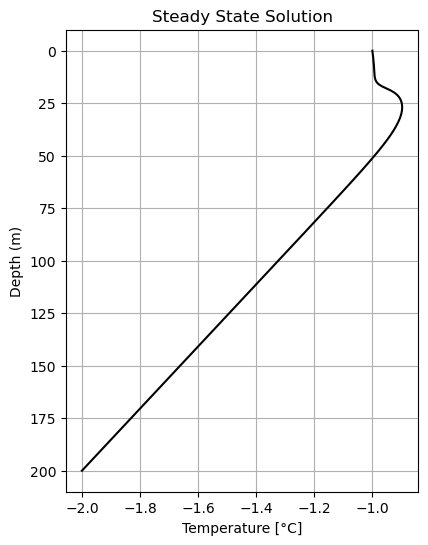

In [161]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.plot(temp,depth,'k')
plt.gca().invert_yaxis()
plt.grid()
plt.ylabel('Depth (m)')
plt.xlabel('Temperature [°C]')
plt.title('Steady State Solution')

Now, exploring of different cases:

Original parameters

In [162]:
beta=0.5
water=0.1
alpha=10
A_max=10**(-2)
A_depth=10**(-4)
A_dip=1.5*(10**(-3))

Changed parameters for $\beta$:

In [163]:
beta1=0.1
beta2=0.8
matrix1,F1=create_M_F(len(depth)-1,I_0,beta1,water,depth,alpha,cp,A_max,A_depth,A_dip,h)
temp1=np.linalg.solve(matrix1,F1)
matrix2,F2=create_M_F(len(depth)-1,I_0,beta2,water,depth,alpha,cp,A_max,A_depth,A_dip,h)
temp2=np.linalg.solve(matrix2,F2)

Changed parameters for $\alpha$:

In [164]:
alpha1=1
alpha2=20
matrix3,F3=create_M_F(len(depth)-1,I_0,beta,water,depth,alpha1,cp,A_max,A_depth,A_dip,h)
temp3=np.linalg.solve(matrix3,F3)
matrix4,F4=create_M_F(len(depth)-1,I_0,beta,water,depth,alpha2,cp,A_max,A_depth,A_dip,h)
temp4=np.linalg.solve(matrix4,F4)

Changed parameters for $A_{max}$, $A_{depth}$ and $A_{dip}$:

In [165]:
A_max1=10**(-3)
A_max2=10**(-1)
A_depth1=10**(-5)
A_depth2=10**(-3)
A_dip1=0.5*(10**(-4))
A_dip2=2.5*(10**(-2))
matrix5,F5=create_M_F(len(depth)-1,I_0,beta,water,depth,alpha,cp,A_max1,A_depth1,A_dip1,h)
temp5=np.linalg.solve(matrix5,F5)
matrix6,F6=create_M_F(len(depth)-1,I_0,beta,water,depth,alpha,cp,A_max2,A_depth2,A_dip2,h)
temp6=np.linalg.solve(matrix6,F6)

Figure for comparisson between different values of Ice fraction, light attenuation and mixing:

<>:28: SyntaxWarning: invalid escape sequence '\c'
<>:29: SyntaxWarning: invalid escape sequence '\c'
<>:30: SyntaxWarning: invalid escape sequence '\c'
<>:28: SyntaxWarning: invalid escape sequence '\c'
<>:29: SyntaxWarning: invalid escape sequence '\c'
<>:30: SyntaxWarning: invalid escape sequence '\c'
C:\Users\vicen\AppData\Local\Temp\ipykernel_17644\2613108217.py:28: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(temp,depth,'k',label='Starting\n$A_{max}=10^{-2}$\n$A_{depth}=10^{-4}$\n$A_{dip}=1.5\cdot10^{-3}$')
C:\Users\vicen\AppData\Local\Temp\ipykernel_17644\2613108217.py:29: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(temp5,depth,'-.b',label='Changed to\n$A_{max}=10^{-3}$\n$A_{depth}=10^{-5}$\n$A_{dip}=0.5\cdot10^{-4}$')
C:\Users\vicen\AppData\Local\Temp\ipykernel_17644\2613108217.py:30: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(temp6,depth,'-.r',label='Changed to\n$A_{max}=10^{-1}$\n$A_{depth}=10^{-3}$\n$A_{dip}=2.5\cdot10^{-2}$')


Text(0.5, 1.0, 'Changing the mixing (A$_{max}$, A$_{depth}$ and A$_{dip}$)')

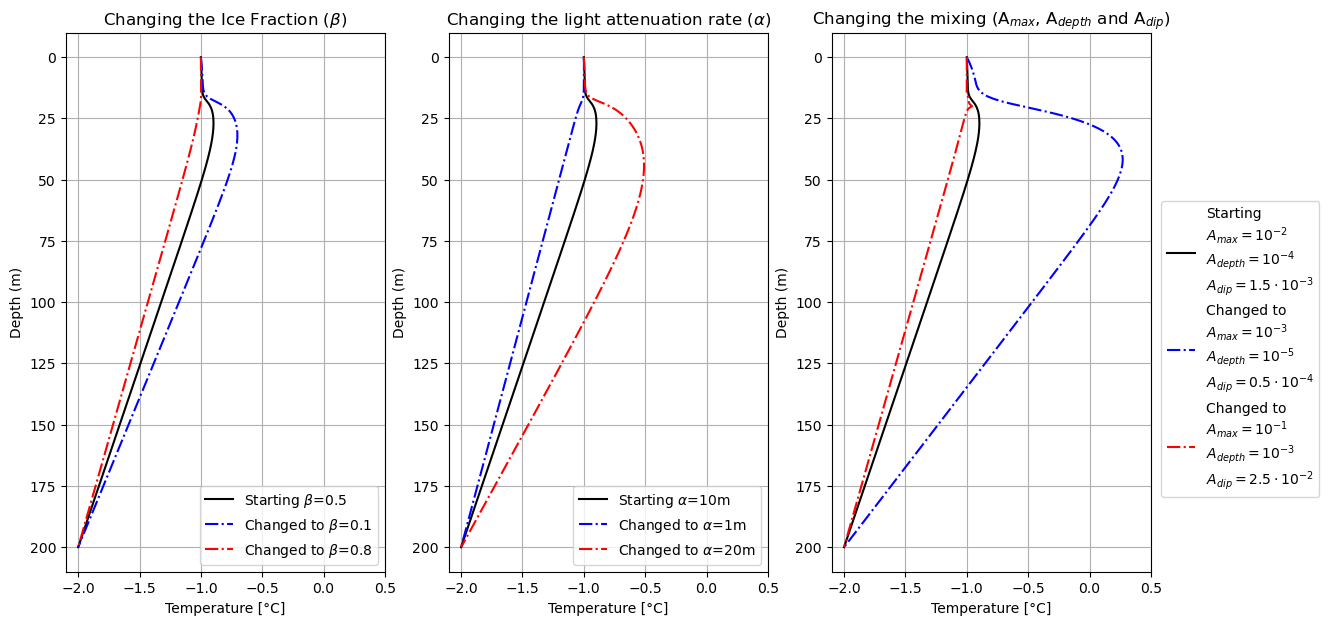

In [166]:

#
plt.figure(figsize=(14,7))
plt.subplot(1,3,1)
plt.plot(temp,depth,'k',label=r'Starting $\beta$='+str(beta))
plt.plot(temp1,depth,'-.b',label=r'Changed to $\beta$='+str(beta1))
plt.plot(temp2,depth,'-.r',label=r'Changed to $\beta$='+str(beta2))
plt.gca().invert_yaxis()
plt.grid()
plt.legend(loc='lower right')
plt.ylabel('Depth (m)')
plt.xlabel('Temperature [°C]')
plt.xlim([-2.1,0.5])
plt.title(r'Changing the Ice Fraction ($\beta$)')
#
plt.subplot(1,3,2)
plt.plot(temp,depth,'k',label=r'Starting $\alpha$='+str(alpha)+'m')
plt.plot(temp3,depth,'-.b',label=r'Changed to $\alpha$='+str(alpha1)+'m')
plt.plot(temp4,depth,'-.r',label=r'Changed to $\alpha$='+str(alpha2)+'m')
plt.gca().invert_yaxis()
plt.grid()
plt.legend(loc='lower right')
plt.ylabel('Depth (m)')
plt.xlabel('Temperature [°C]')
plt.xlim([-2.1,0.5])
plt.title(r'Changing the light attenuation rate ($\alpha$)')
#
plt.subplot(1,3,3)
plt.plot(temp,depth,'k',label='Starting\n$A_{max}=10^{-2}$\n$A_{depth}=10^{-4}$\n$A_{dip}=1.5\cdot10^{-3}$')
plt.plot(temp5,depth,'-.b',label='Changed to\n$A_{max}=10^{-3}$\n$A_{depth}=10^{-5}$\n$A_{dip}=0.5\cdot10^{-4}$')
plt.plot(temp6,depth,'-.r',label='Changed to\n$A_{max}=10^{-1}$\n$A_{depth}=10^{-3}$\n$A_{dip}=2.5\cdot10^{-2}$')
plt.gca().invert_yaxis()
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 0.2,0.5,0.5))
plt.ylabel('Depth (m)')
plt.xlabel('Temperature [°C]')
plt.xlim([-2.1,0.5])
plt.title(r'Changing the mixing (A$_{max}$, A$_{depth}$ and A$_{dip}$)')

$\textbf{Part 02:}$ Time Dependence

Using the solution that we calculate for the steady state, we can solve $\frac{\partial T}{\partial t}$ using the $\textit{Forward Euler}$ method as follows:


$$T'(t_{i}) \approx \frac{T_{i+1} - T_{i}}{\Delta t} \iff \frac{\partial T}{\partial t} =  \frac{T_{i-1} \Big ( A_{h_{i-\frac{1}{2}}} \Big ) - T_{i} \Big ( A_{h_{i-\frac{1}{2}}} + A_{h_{i+\frac{1}{2}}} \Big ) + T_{i+1} \Big ( A_{h_{i+\frac{1}{2}}} \Big )}{(\Delta z)^{2}} + \frac{I_{0}(1-\beta_{ice}-\gamma_{water})e^{-z/\alpha}}{\alpha c_p}$$



$$\Longrightarrow \frac{T_{i+1} - T_{i}}{\Delta t} = \frac{T_{i-1} \Big ( A_{h_{i-\frac{1}{2}}} \Big ) - T_{i} \Big ( A_{h_{i-\frac{1}{2}}} + A_{h_{i+\frac{1}{2}}} \Big ) + T_{i+1} \Big ( A_{h_{i+\frac{1}{2}}} \Big )}{(\Delta z)^{2}} + \frac{I_{0}(1-\beta_{ice}-\gamma_{water})e^{-z/\alpha}}{\alpha c_p}$$

And because we have the solution for the right side of this equation, this would be the same as:

$$\frac{T_{i+1} - T_{i}}{\Delta t} = \textbf{coefficients matrix} \cdot \textbf{Steady State Temperatures Matrix}$$


$\textbf{Initial Condition Scenario (I)}$

In [167]:
matrix,F=create_M_F(len(depth)-1,I_0,beta,water,depth,alpha,cp,A_max,A_depth,A_dip,h)
temp=np.linalg.solve(matrix,F)

In the next line I specify the starting time set as 0, a time step of 10 s, and a final time of 86.400 s, which is the number of seconds in one day. The initial condition is set to be the steady state matrix that we obtain in question 01. 

In [168]:
from collections import namedtuple
#
initialVals = {
    'yinitial': temp,
    't_beg': 0.,
    't_end': 86400.,
    'dt': 10,
}
initvals = namedtuple('initvals',
                      'dt t_beg t_end yinitial')
coeffs = initvals(**initialVals)
#
theTime=np.arange(coeffs.t_beg,coeffs.t_end,coeffs.dt)

Next, we create a function for the Forward Euler method:

In [169]:
def derivs(temp,matrix,f_matrix):
    f = np.matmul(matrix,temp) - f_matrix
    return f
#
y=coeffs.yinitial
y_t = np.empty([len(theTime),len(y)],np.float64)

Then, we are creating a matrix with dimendions $\textbf{depth x time}$, which is going to contain each profile for each one of the different times. Here we specify our boundary conditions to be set as the same temperatures of the forward and previous depth, which means that we will have a fixed boundary at the beginning and end of the profile with the temperatures of the surface and bottom waters respectively.

In [170]:
for i in range(0,len(theTime)):
  sol=y + coeffs.dt*derivs(y,matrix,F)
  sol[0] = sol[1] 
  sol[-1] = sol[-2]
  y_t[i,:]=(sol)
  y=sol

The plot below shows each one of the profiles, specifying the initial and last profile for having a better understanding of how the temperatures are changing through time.

Text(0.5, 1.0, 'Temperature Profiles')

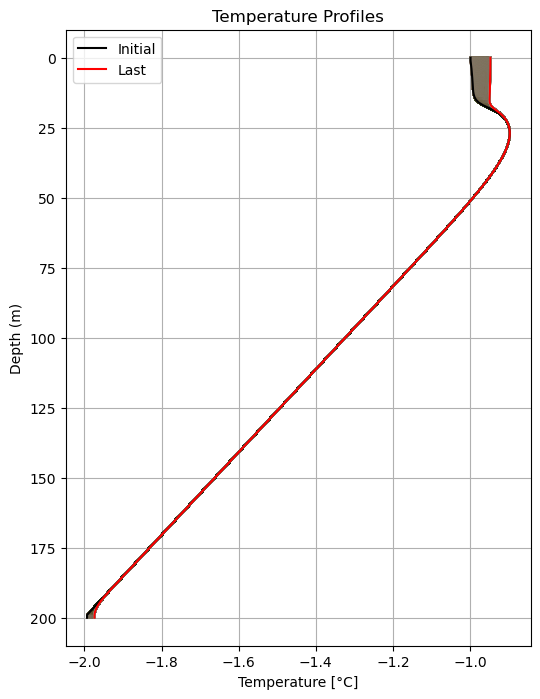

In [171]:
plt.figure(figsize=(6,8))
plt.plot(y_t.T,depth)
plt.plot(y_t.T[:,0],depth,'k',label='Initial')
plt.plot(y_t.T[:,-1],depth,'r',label='Last')
plt.legend()
plt.gca().invert_yaxis()
plt.grid()
plt.ylabel('Depth (m)')
plt.xlabel('Temperature [°C]')
plt.title('Temperature Profiles')

$\textbf{a.-}$ What happens during the initial timesteps?


During the initial time steps we get our initial steady state solution, which can be seen as a black line in the plot above. For the next timesteps we observed some small changes in the uper 10 m and at 200 m between the black and red profiles.

$\textbf{b.-}$ What happens as the system approaches a new equilibrium.?

Changes in the temperature profiles can be seen in the upper 10 m and at bottom near 200 m; we see that surface waters are getting warmer in time, while the same happens at the bottom but in a smaller range of depths, where the changes are smaller. At intermediate depths we see that there's no temperature changes, meaning that the main differences in the temperature profiles are occurring at surface and bottom waters.

$\textbf{c.-}$ Whether these simulations conserve energy, and how you can tell. If not, why not - where is
energy being lost or gained, and why?

The simulation is gaining and conserving energy, since it's not going back into a steady state completely through time because of the constant radiative flux, which is increasing tempereatures in surface waters.

$\textbf{Initial Condition Scenario (II)}$

We follow the same steps than for the previous scenario, but just changing the boundary conditions. In this case we are setting the first 5 m depth to have increased temperatures in 0.2 °C until 43200 seconds, which is half of the day (this was placed without any particular reason). Then, after this time step, the increasing temperatures go back to the initial conditions because the source of energy stops.

In [172]:
matrix,F=create_M_F(len(depth)-1,I_0,beta,water,depth,alpha,cp,A_max,A_depth,A_dip,h)
temp=np.linalg.solve(matrix,F)

In [173]:
from collections import namedtuple
#
initialVals = {
    'yinitial': temp,
    't_beg': 0.,
    't_end': 86400.,
    'dt': 10,
}
initvals = namedtuple('initvals',
                      'dt t_beg t_end yinitial')
coeffs = initvals(**initialVals)
#
theTime=np.arange(coeffs.t_beg,coeffs.t_end,coeffs.dt)
def derivs(temp,matrix,f_matrix):
    f = np.matmul(matrix,temp) - f_matrix
    return f
#
y=coeffs.yinitial
y_i=coeffs.yinitial
y_i[0:5]=y_i[0:5]+0.2
y_t = np.empty([len(theTime),len(y)],np.float64)
for i in range(0,len(theTime)):
   if i<len(theTime/2):
    sol=y_i + coeffs.dt*derivs(y_i,matrix,F)
    sol[0] = sol[1] 
    sol[-1] = sol[-2]
    y_t[i,:]=(sol)
    y_i=sol
   else:
    sol=y + coeffs.dt*derivs(y,matrix,F)
    sol[0] = sol[1] 
    sol[-1] = sol[-2]
    y_t[i,:]=(sol)
    y=sol  

Text(0.5, 1.0, 'Temperature Profiles')

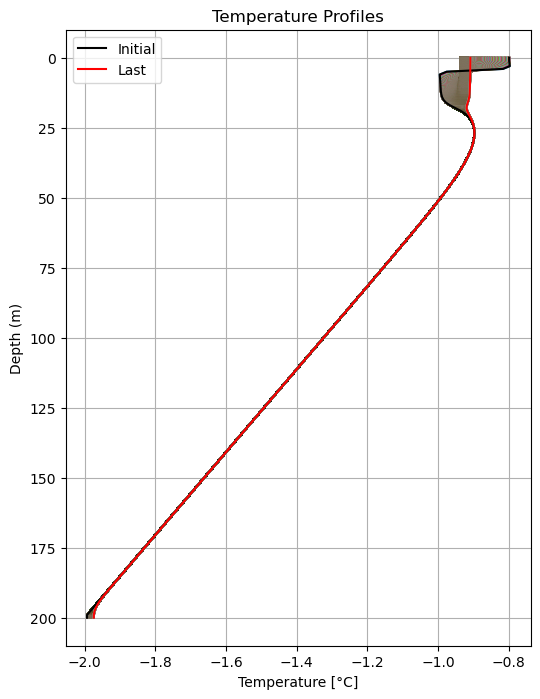

In [174]:
plt.figure(figsize=(6,8))
plt.plot(y_t.T,depth)
plt.plot(y_t.T[:,0],depth,'k',label='Initial')
plt.plot(y_t.T[:,-1],depth,'r',label='Last')
plt.legend()
plt.gca().invert_yaxis()
plt.grid()
plt.ylabel('Depth (m)')
plt.xlabel('Temperature [°C]')
plt.title('Temperature Profiles')

$\textbf{a.-}$ What happens during the initial timesteps?

During the first time steps we get that the surface temperature stays quite constant near -0.8°C for the first 5 m, then it describes a rapid change that goes to -1°C, then it starts following the same shape as for the steady state scenario with no changes with depth for deeper waters. 

$\textbf{b.-}$ What happens as the system approaches a new equilibrium.?

After these rapid changes in temperature near surface waters, the system tries to reach equilibrium, making the shape of the profile to look smoother with time, until it reaches a quite constant temperature near -0.9°C for the first 10-15 m depth.

$\textbf{c.-}$ Whether these simulations conserve energy, and how you can tell. If not, why not - where is
energy being lost or gained, and why?

In this case, and same as before, the system is gaining energy from the constant radiative flux at the surface and also it's conserving energy because the temperature profile is not going back to the initial state at surface waters, reaching an equilibrium at sligthly different temperatures from the initial ones. If the system is not conserving energy, then we should see that the temperature profiles would reach our steady state temperatures.

$\textbf{Initial Condition Scenario (III)}$

In this case, we are using our steady state solutions, changing just the temperatures between 150-160 m depth, increasing their values in 0.2°C.

In [175]:
matrix,F=create_M_F(len(depth)-1,I_0,beta,water,depth,alpha,cp,A_max,A_depth,A_dip,h)
temp=np.linalg.solve(matrix,F)

In [176]:
from collections import namedtuple
#
initialVals = {
    'yinitial': temp,
    't_beg': 0.,
    't_end': 86400.,
    'dt': 10,
}
initvals = namedtuple('initvals',
                      'dt t_beg t_end yinitial')
coeffs = initvals(**initialVals)
#
theTime=np.arange(coeffs.t_beg,coeffs.t_end,coeffs.dt)
def derivs(temp,matrix,f_matrix):
    f = np.matmul(matrix,temp) - f_matrix
    return f
#
y=coeffs.yinitial
y[150:160]=y[150:160]+0.2
y_t = np.empty([len(theTime),len(y)],np.float64)
for i in range(0,len(theTime)):
    sol=y + coeffs.dt*derivs(y,matrix,F)
    sol[0] = sol[1] 
    sol[-1] = sol[-2]
    y_t[i,:]=(sol)
    y=sol  

Text(0.5, 1.0, 'Temperature Profiles')

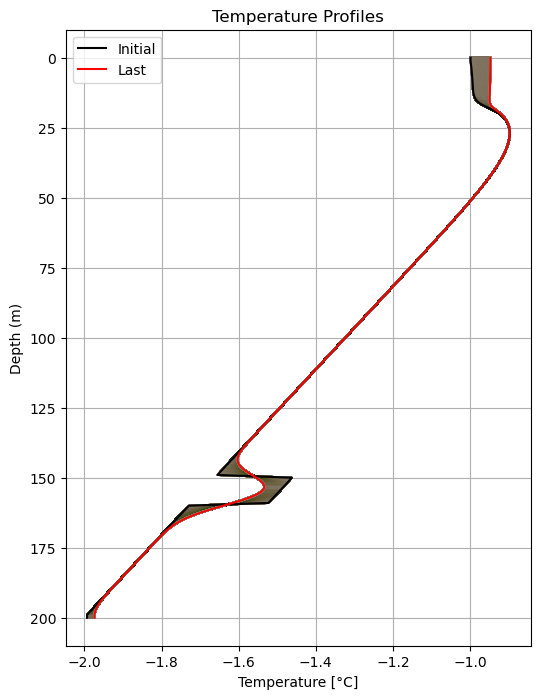

In [177]:
plt.figure(figsize=(6,8))
plt.plot(y_t.T,depth)
plt.plot(y_t.T[:,0],depth,'k',label='Initial')
plt.plot(y_t.T[:,-1],depth,'r',label='Last')
plt.legend()
plt.gca().invert_yaxis()
plt.grid()
plt.ylabel('Depth (m)')
plt.xlabel('Temperature [°C]')
plt.title('Temperature Profiles')

$\textbf{a.-}$ What happens during the initial timesteps?

For the initial timesteps we are getting the same changes in surface waters, while between 150m and 160m depth we see that there's a very steep change in temperatures because we set them to be increased in 0.2°C. However, after the initial timestep, we can see that temperatures start decreasing again to reach a new equilibrium.

$\textbf{b.-}$ What happens as the system approaches a new equilibrium.?

Between 150m and 160m depth we see that the system tries to reach a new equilibrium, where there's not only a decrease in temperatures, but also a sligthly increase; from waters above and below 150-160 m we see that temperatures increase, while between 150m and 160m temperatures starts decreasing.

$\textbf{c.-}$ Whether these simulations conserve energy, and how you can tell. If not, why not - where is
energy being lost or gained, and why?

The system is also gaining and conserving energy, since it's changing its temperatures to reach a new equilibrium that's not the same as the initial one, where we are seeing increasing temperatures in surface because of the constant radiative flux of energy and a steep change between 150-160m because of a new constant heat source that's adding energy to the system.

By comparing scenarios II and III we can notice that the first one describes a faster temporal evolution compared to the second one. This could be related to the constant radiative flux that surface waters are recieving, which is adding more energy to the system and therefore making it easier to change their temperature. On the other hand, since we don't have as much radiate flux in deeper waters compared to the surface, then is more difficult for these waters to change their temperatures. So, although we have a constant source of heat between 150-160m that is giving more energy to the system, it's not as much as the one that is on the surface, so temperature changes are still going to be slower in deeper waters compared to surface waters.